<a href="https://www.kaggle.com/datajmcn/happiness-visualisations-2021?scriptVersionId=88801072" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Happiness Report Visualisations 2021
***
Discovering how data visualisations can help to provide happiness.

Analysis completed :
* Plotly scatter
> * Linear trendline
> * Non-Linear trendline
* Plotly scattermatrix : need to re-define analysis
* Radar plots
> * Seaborn : a lot of effort required to create the plots
> * Plotly : had a seamless construction process which allowed for automation of multiple plots

Main impacts from ladder score are using explained variables
1. Log GDP per capita
2. Social support
3. Healthy life expectancy

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
# Display multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load data

In [3]:
df = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df.shape

(149, 20)

In [5]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
# Quick summary of the dataset. Using the .T method to transpose the result
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country name,149,149,Germany,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regional indicator,149,10,Sub-Saharan Africa,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ladder score,149.0,NaN,NaN,NaN,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,NaN,NaN,NaN,0.058752,0.022001,0.026,0.043,0.054,0.07,0.173
upperwhisker,149.0,NaN,NaN,NaN,5.648007,1.05433,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,NaN,NaN,NaN,5.417631,1.094879,2.449,4.706,5.413,6.128,7.78
Logged GDP per capita,149.0,NaN,NaN,NaN,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,NaN,NaN,NaN,0.814745,0.114889,0.463,0.75,0.832,0.905,0.983
Healthy life expectancy,149.0,NaN,NaN,NaN,64.992799,6.762043,48.478,59.802,66.603,69.6,76.953
Freedom to make life choices,149.0,NaN,NaN,NaN,0.791597,0.113332,0.382,0.718,0.804,0.877,0.97


## Visualisations with Plotly

In [7]:
import plotly.express as px

# Review a bubble graph to understand which regions have a higher ladder score bubble
fig = px.scatter(df,
                x="Logged GDP per capita",
                y="Healthy life expectancy",
                size="Ladder score",
                color="Regional indicator",
                hover_name="Country name",
                size_max=10)
fig.show()

By using the ladder score for the buble size, we don't see much difference in the values as the sizes are all very similar. Having the population size of each country could have helped to show a differential.

In [8]:
# Testing scatter graph matrix by all columns that could potentially impact the Ladder score
fig = px.scatter_matrix(df, dimensions=['Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], color="Regional indicator")
fig.show()

In [9]:
# Adding a linear trend line
fig = px.scatter(df,
                x="Logged GDP per capita",
                y="Healthy life expectancy",
                size="Ladder score",
                color="Regional indicator",
                hover_name="Country name",
                size_max=10,
                trendline="ols")
fig.show()

In [10]:
# Retreiving model parameters
results = px.get_trendline_results(fig)
results

,Regional indicator,px_fit_results
0,Western Europe,<statsmodels.regression.linear_model.Regressio...
1,North America and ANZ,<statsmodels.regression.linear_model.Regressio...
2,Middle East and North Africa,<statsmodels.regression.linear_model.Regressio...
3,Latin America and Caribbean,<statsmodels.regression.linear_model.Regressio...
4,Central and Eastern Europe,<statsmodels.regression.linear_model.Regressio...
5,East Asia,<statsmodels.regression.linear_model.Regressio...
6,Southeast Asia,<statsmodels.regression.linear_model.Regressio...
7,Commonwealth of Independent States,<statsmodels.regression.linear_model.Regressio...
8,Sub-Saharan Africa,<statsmodels.regression.linear_model.Regressio...
9,South Asia,<statsmodels.regression.linear_model.Regressio...


In [11]:
# Extract model fit results from the analysis
results.query("`Regional indicator` == 'Middle East and North Africa'").px_fit_results.iloc[0].summary()

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     15.80
Date:                Sat, 26 Feb 2022   Prob (F-statistic):            0.00122
Time:                        15:14:26   Log-Likelihood:                -40.024
No. Observations:                  17   AIC:                             84.05
Df Residuals:                      15   BIC:                             85.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5300      7.095      5.290      0.000      22.407      52.653
x1             2.9049      0.731      3.975      0.001       1.347       4.463
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.875
Skew:                           0.239   Prob(JB):                        0.646
Kurtosis:                       1.997   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Adding a non-linear trend line
fig = px.scatter(df,
                x="Logged GDP per capita",
                y="Healthy life expectancy",
                size="Ladder score",
                color="Regional indicator",
                hover_name="Country name",
                size_max=10,
                trendline="lowess")
fig.show()

In [13]:
# Review a random sample of records
df.sample(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
131,Egypt,Middle East and North Africa,4.283,0.045,4.371,4.195,9.367,0.750,61.998,0.749,-0.182,0.795,2.43,0.954,0.647,0.426,0.446,0.069,0.092,1.648
33,Slovakia,Central and Eastern Europe,6.331,0.041,6.411,6.251,10.369,0.936,69.201,0.766,-0.124,0.911,2.43,1.304,1.066,0.653,0.468,0.107,0.018,2.714
94,Ghana,Sub-Saharan Africa,5.088,0.067,5.219,4.958,8.580,0.727,57.586,0.807,0.123,0.848,2.43,0.680,0.595,0.287,0.517,0.268,0.058,2.684
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653


## Radar Graph

### 1. Seaborn

In [14]:
# Import libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Set up data - using Finland as an example
labels = np.array(['Explained by: Log GDP per capita', 'Explained by: Social support','Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'])
stats = df.loc[0,labels].values

In [16]:
# Create the angles
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle
# close the plot
stats=np.concatenate((stats,[stats[0]]))  # Closed
angles=np.concatenate((angles,[angles[0]]))  # Closed

([<matplotlib.projections.polar.ThetaTick at 0x7fb287ef5e50>,
 [Text(0.0, 0, 'Explained by: Log GDP per capita'),
  Text(1.0471975511965976, 0, 'Explained by: Social support'),
  Text(2.0943951023931953, 0, 'Explained by: Healthy life expectancy'),
  Text(3.141592653589793, 0, 'Explained by: Freedom to make life choices'),
  Text(4.1887902047863905, 0, 'Explained by: Generosity'),
  Text(5.235987755982988, 0, 'Explained by: Perceptions of corruption')])

Text(0.5, 1.0, "['Finland'] Ladder Score = [7.842]")

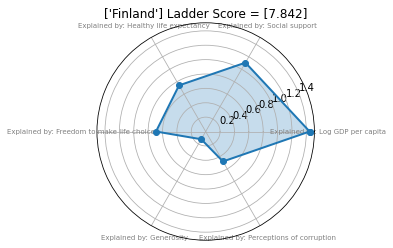

In [17]:
# Update the plot with values
ax = plt.subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
plt.xticks(angles[:-1], labels, color='grey', size=7)
ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
ax.set_title(str([df.loc[0,"Country name"]])+" Ladder Score = "+ str([df.loc[0,"Ladder score"]]))  # Set the country name as the title
ax.grid(True)
plt.show()

### 2. Plotly

In [18]:
# Radar from plotly
stats_new = df.loc[0,labels].values
fig = px.line_polar(df, r=stats_new, theta=labels, line_close=True)
fig.update_traces(fill='toself')

In [19]:
# Multiple radar testing
import plotly.graph_objects as go

fig = go.Figure()

# Stats for three countries Finland[0], Estonia[38] and India[137]
stats1 = df.loc[0,labels].values
stats2 = df.loc[38,labels].values
stats3 = df.loc[137,labels].values

fig.add_trace(go.Scatterpolar(
      r=stats1,
      theta=labels,
      fill='toself',
      name='Finland'
))
fig.add_trace(go.Scatterpolar(
      r=stats2,
      theta=labels,
      fill='toself',
      name='Estonia'
))
fig.add_trace(go.Scatterpolar(
      r=stats3,
      theta=labels,
      fill='toself',
      name='India'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

In [20]:
# Methods to return required parameters to create the radar plot. Previous method had too many hardcoded values.
# The methods below aim to automate the data extraction process

# 1. Extract the country stats
def country_stats(df, index, labels):
    stats = df.loc[index, labels].values
    return stats

# 2. Extract the country name
def country_name(df, index, variable='Country name'):
    name = df.loc[index, variable]
    return name

# 3. Update the trace
def add_to_trace(stats, labels, name):
    return fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name=name
    ))

In [21]:
# Testing to understand the values returned for the methods created

# Output the values for the columns at the index value
country_stats(df, 137, labels)
# Output the country name for the index
country_name(df, 137)

array([0.279, 0.377, 0.1, 0.408, 0.243, 0.047], dtype=object)

'Sierra Leone'

In [22]:
# Testing the new methods for Finland
fig = go.Figure()

# Create the trace values to update
add_to_trace(country_stats(df, 0, labels), labels, country_name(df, 0))

# Update the figure
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

In [23]:
# Review random list of countries
import random
from numpy import random

# Set the seed so that the same list is returned each time
random.seed(10)
x=random.randint(150, size=(5))
x

array([  9, 125,  15,  64, 113])

In [24]:
# Radar charts of the random list of countries
fig = go.Figure()

# Loop over the numpy array
for i in x:
    add_to_trace(country_stats(df, i, labels), labels, country_name(df, i))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)